In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
df = pd.read_csv('archive/toy_dataset.csv')
df.head(1)

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No


In [10]:
df.drop(['Number', 'City'], axis=1, inplace=True)

In [11]:
df.head(1)


,Gender,Age,Income,Illness
0,Male,41,40367.0,No


In [30]:
np. random. seed (23)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df = pd.DataFrame(class1_sample,columns=[ 'feature1', 'feature2', 'feature3'])
df['target'] = 1
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array ([[1,0,0], [0,1,0], [0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df1 = pd.DataFrame(class2_sample, columns=[ 'featurel', ' feature2', 'feature3'])
df1['target'] = 0
# df = df.append(df1, ignore_index=True)
df = pd.concat([df, df1], ignore_index=True)
df = df.sample(40)

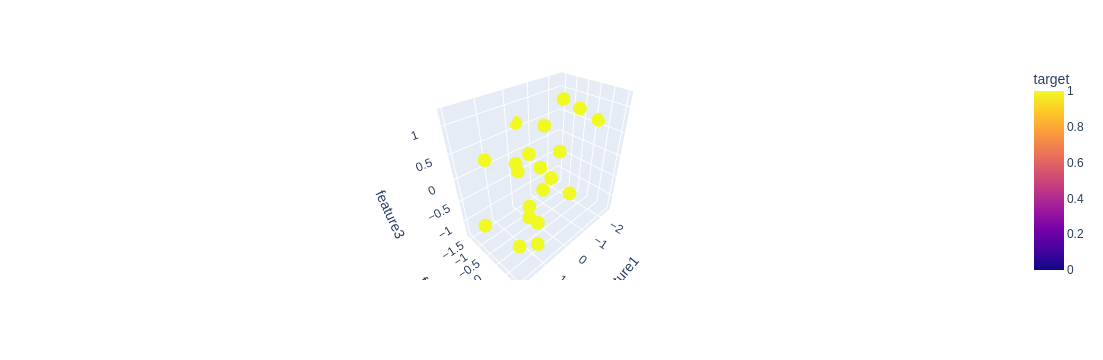

In [34]:
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'], color=df['target'])
# fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict (mode= 'markers'))
fig.show()

In [3]:

import numpy as np
import pandas as pd

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)

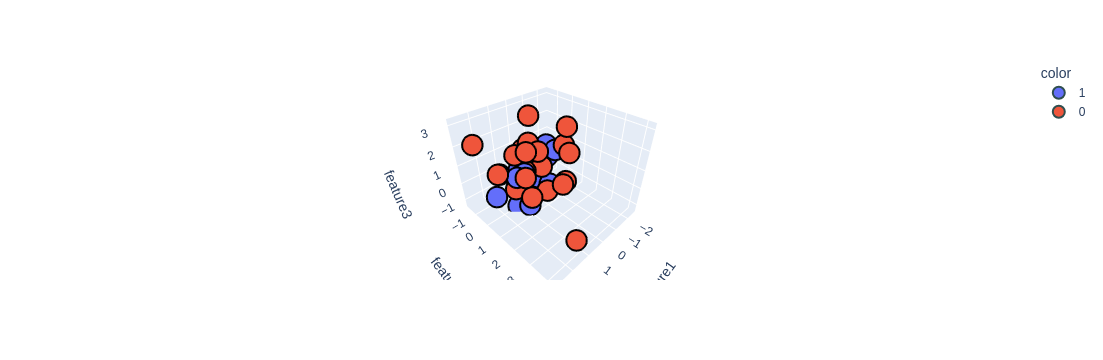

In [4]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [5]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [6]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [7]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [8]:

eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [9]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


AttributeError: 'Arrow3D' object has no attribute 'do_3d_projection'

<Figure size 700x700 with 1 Axes>

In [10]:

pc = eigen_vectors[0:2]
pc


array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

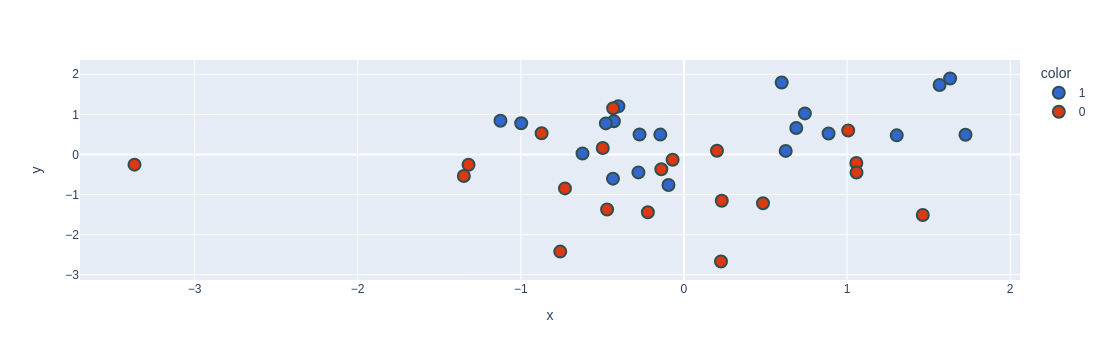

In [11]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()
     


new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

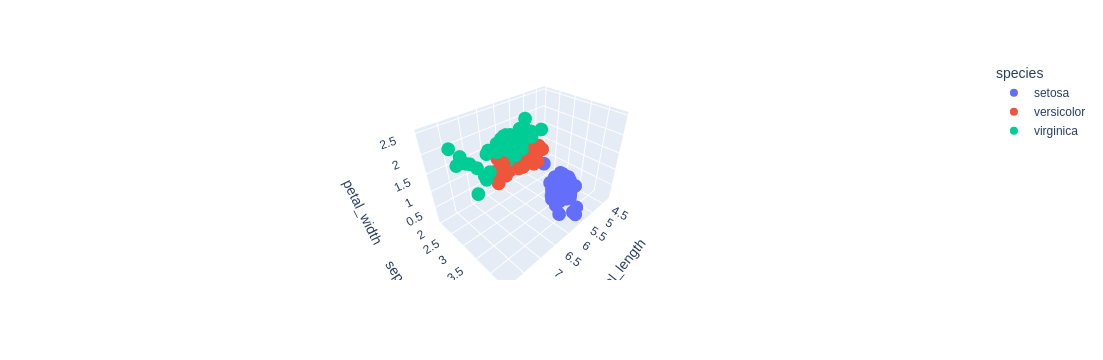

In [35]:

# import numpy as np
# import pandas as pd

# np.random.seed(23) 

# mu_vec1 = np.array([0,0,0])
# cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])Populating the interactive namespace from numpy and matplotlib
# class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

# df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
# df['target'] = 1

# mu_vec2 = np.array([1,1,1])
# cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
# class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

# df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

# df1['target'] = 0

# df = df.append(df1,ignore_index=True)
# Populating the interactive namespace from numpy and matplotlib
# df = df.sample(40)
     

# import plotly.express as px
# #y_train_trf = y_train.astype(str)
# fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
#               color=df['target'].astype('str'))
# fig.update_traces(marker=dict(size=12,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'))

# fig.show()
     

# # Step 1 - Apply standard scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])
     

# # Step 2 - Find Covariance Matrix
# covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
# print('Covariance Matrix:\n', covariance_matrix)

# # Step 3 - Finding EV and EVs
# eigen_values, eigen_vectors = np.linalg.eig(covariance_matriPopulating the interactive namespace from numpy and matplotlibx)
     

# eigen_values

# eigen_vectors

# %pylab inline

# from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d import proj3d
# from matplotlib.patches import FancyArrowPatch


# class Arrow3D(FancyArrowPatch):Populating the interactive namespace from numpy and matplotlib
#     def __init__(self, xs, ys, zs, *args, **kwargs):
#         FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
#         self._verts3d = xs, ys, zs

#     def draw(self, renderer):
#         xs3d, ys3d, zs3d = self._verts3d
#         xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
#         self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
#         FancyArrowPatch.draw(self, renderer)

# fig = plt.figure(figsize=(7,7))
# ax = fig.add_subplot(111, projection='3d')
# Populating the interactive namespace from numpy and matplotlib
# ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
# ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
# for v in eigen_vectors.T:
#     a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
#     ax.add_artist(a)
# ax.set_xlabel('x_values')
# ax.set_ylabel('y_values')
# ax.set_zlabel('z_values')

# plt.title('Eigenvectors')

# plt.show()
     
# Populating the interactive namespace from numpy and matplotlib


# pc = eigen_vectors[0:2]
# pc

# transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# # 40,3 - 3,2
# new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
# new_df['target'] = df['target'].values
# new_df.head()
     


# new_df['target'] = new_df['target'].astype('str')
# fig = px.scatter(x=new_df['PC1'],
#                  y=new_df['PC2'],
#                  color=new_df['target'],
#                  color_discrete_sequence=px.colors.qualitative.G10
#                 )

# fig.update_traces(marker=dict(size=12,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'))
# fig.show()